# Part 3) [Advanced] Running the minimisation interactively and getting hold of the NLL (at the minimum)

In [2]:
import ROOT as r

Welcome to JupyROOT 6.08/02


Here's the model from exercise 1b

In [3]:
mBC = r.RooRealVar('B0_mbc', 'm_{MC}', 5.2, 5.29, 'GeV/c^{2}')

# signal model
mB0 = r.RooRealVar('mB0', 'm_{B^0}', 5.280, 5.1, 5.3, 'GeV/c^{2}')      # the mass of the B0 meson
gB0 = r.RooRealVar('gB0', '#Gamma_{B^0}', 0.003, 0.0001, 0.015, 'GeV/c^{2}')   # the width of the B0 meson
alp = r.RooRealVar('alp', '#alpha_{CB}', 1.3, 0.1, 5)
ncb = r.RooRealVar('ncb', 'n_{CB}', 15)
sig = r.RooCBShape('sig', 'signal component', mBC, mB0, gB0, alp, ncb)

# background model
mCt = r.RooRealVar('mCt', 'm_{cutoff}', 5.29, 5.2, 5.3, 'GeV/c^{2}')
crv = r.RooRealVar('crv', 'c_{curvature}', -20, -80, -1)
bkg = r.RooArgusBG('bkg', 'background component', mBC, mCt, crv)

# signal + background
nsg = r.RooRealVar('nsg', 'n_{s}', 7000, 10, 10000)
nbg = r.RooRealVar('nbg', 'n_{b}', 3000, 10, 10000)
pdf = r.RooAddPdf('pdf', 'two component model', r.RooArgList(sig, bkg), r.RooArgList(nsg, nbg))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



## Look at the NLL

Before I do anything let's open up the data again

In [3]:
# get the data in a TTree format
fi = r.TFile('fitme.root', 'READ')
tr = r.TTree()
fi.GetObject('BtoKstG', tr)

# get the data in RooFit land
rds = r.RooDataSet('data', 'B#rightarrow K^{*}#gamma simulation', tr, r.RooArgSet(mBC))

[#1] INFO:Eval -- RooAbsReal::attachToTree(B0_mbc) TTree Float_t branch B0_mbc will be converted to double precision


So far we've been using `RooAbsPdf::fitTo(RooDataSet*)`. This is OK for simple fits. But what if we want to debug things and actually plot the likelihood?
`RooFit` let's us run the fit interactively calling the minimisation methods by instantiating a `RooMinuit` object.

In [4]:
nll = pdf.createNLL(rds, r.RooFit.Extended(True))

In [5]:
minuit = r.RooMinuit(nll)

In [6]:
minuit.setStrategy(2)
#minuit.setVerbose(True)
minuit.migrad()
#minuit.minos()

0

 **********
 **    9 **SET STR           2
 **********
 NOW USING STRATEGY  2: MAKE SURE MINIMUM TRUE, ERRORS CORRECT  
 **********
 **   14 **MIGRAD        3500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  2.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 MINUIT WARNING IN HESSE   
 ============== Negative diagonal element 1 in Error Matrix
 MINUIT WARNING IN HESSE   
 ============== Negative diagonal element 5 in Error Matrix
 MINUIT WARNING IN HESSE   
 ============== 1142.65 added to diagonal of error matrix
 EIGENVALUES OF SECOND-DERIVATIVE MATRIX:
        -2.3809e+01  6.2944e-01  8.4245e-01  1.0448e+00  1.0821e+00  1.2836e+00  2.5927e+01
 MINUIT WARNING IN HESSE   
 ============== MATRIX FORCED POS-DEF BY ADDING 23.834920 TO DIAGONAL.
 FCN=-76973.9 FROM HESSE     STATUS=NOT POSDEF     80 CALLS          81 TOTAL
                     EDM=6.80019e+06    STRATEGY= 2      ERR MATRIX NOT POS-DEF
  EXT PARAMETER     

In [7]:
minuit.hesse()

0

 **********
 **   19 **HESSE        3500
 **********
 COVARIANCE MATRIX CALCULATED SUCCESSFULLY
 FCN=-77829.9 FROM HESSE     STATUS=OK             64 CALLS         751 TOTAL
                     EDM=1.11095    STRATEGY= 2      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                INTERNAL      INTERNAL  
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE   
   1  alp          1.10110e+00   8.08582e-02   1.93546e-04   3.07831e+01
   2  crv         -4.35462e+01   3.40938e+00   2.29522e-03  -7.71950e-02
   3  gB0          3.38457e-03   7.87748e-05   7.24411e-05  -5.93322e-01
   4  mB0          5.27957e+00   8.64582e-05   4.41752e-05   9.20186e-01
   5  mCt          5.28978e+00   5.01766e-04   8.58942e-02   9.20112e-01
   6  nbg          3.27124e+03   8.73473e+01   1.04144e-04  -3.54476e-01
   7  nsg          3.93372e+03   9.10572e+01   1.07634e-04  -2.16149e-01
                               ERR DEF= 0.5
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR=  7   

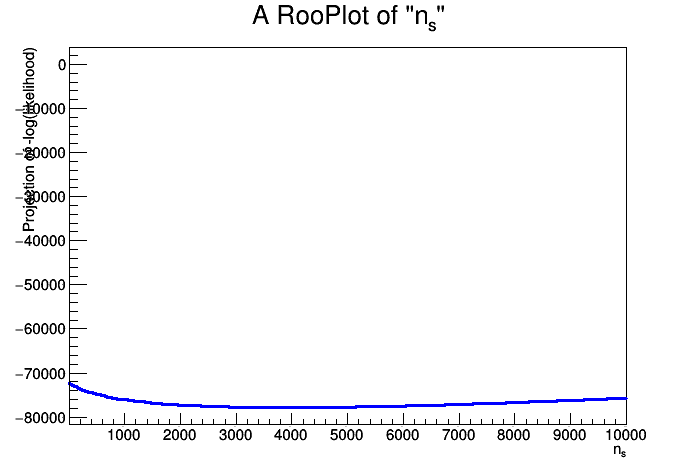

In [8]:
canvas = r.TCanvas()
nsg_plot = nsg.frame()
nll.plotOn(nsg_plot)
#nsg_plot.SetMaximum(-70000)
nsg_plot.Draw()
canvas.Draw()

It's important to understand this is just a projection of the likelihood (a multidimensional function).